In [255]:
import pandas as pd
data = pd.read_csv("Task 3 and 4_Loan_Data.csv")
data.head(4)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0


In [256]:
print(data.columns)
print(data.shape)
print(len(data))

Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')
(10000, 8)
10000


In [257]:
data.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [258]:
features = ['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score']
X = data[features]
Y = data.default

In [259]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.7, train_size=0.3, random_state=0)

In [260]:
#mi scores
from sklearn.feature_selection import mutual_info_classif
def mutal(X, Y):
    info = mutual_info_classif(X, Y)
    info = pd.Series(info, name='mutual infos', index = X.columns)
    info = info.sort_values(ascending=False)
    return info

credit_lines_outstanding    0.421366
total_debt_outstanding      0.304367
fico_score                  0.051001
years_employed              0.047646
loan_amt_outstanding        0.005058
income                      0.003821
Name: mutual infos, dtype: float64


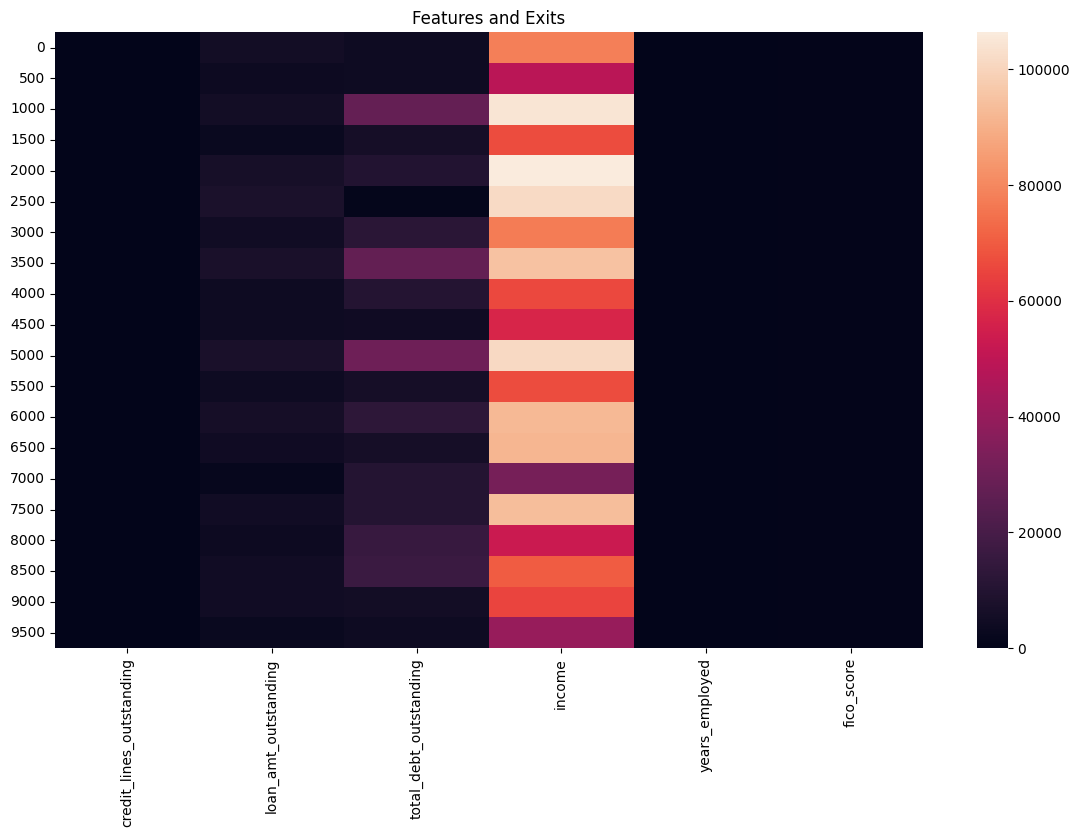

In [261]:
print(mutal(X, Y))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
plt.title("Features and Exits")
sns.heatmap(X[::500])
plt.show()

In [262]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('model', RandomForestClassifier(class_weight='balanced' ,random_state=0, n_estimators=400))
    ])
model.fit(train_X, train_Y)
pred = model.predict(valid_X)


In [263]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, train_X, train_Y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean()*100)

[0.98666667 0.99166667 0.99166667 0.99333333 0.98833333]
99.03333333333333


In [264]:
inp = {
    'credit_lines_outstanding': [int(input())],
    'loan_amt_outstanding': [float(input())],
    'total_debt_outstanding': [float(input())],
    'income': [float(input())],
    'years_employed': [int(input())],
    'fico_score': [int(input())]
    }

In [265]:
from sklearn.metrics import accuracy_score
print(accuracy_score(valid_Y, pred))
pd = model.predict_proba(pd.DataFrame(inp))[0,1]


0.9928571428571429


In [266]:
print(f'chance of returning: {pd:.4f}')
print(f'chance of not returning: {1-pd:.4f}')

chance of returning: 0.0000
chance of not returning: 1.0000
